# Leer datasets

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris = iris.frame
iris.drop(columns=['target'], inplace=True)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Realizamos los clusters

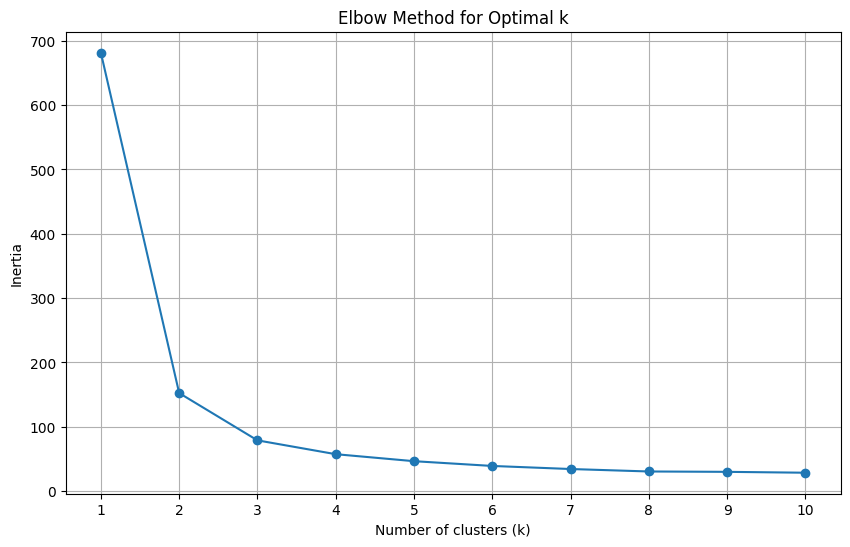

In [15]:
#hagamos metodo del codo para determinar el numero de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(data, max_k=10):
    inertia = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()
# Aplicar el método del codo
elbow_method(iris)

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(iris)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit(iris)
dbscan_labels = dbscan.labels_
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(iris)
gmm_labels = gmm.predict(iris)

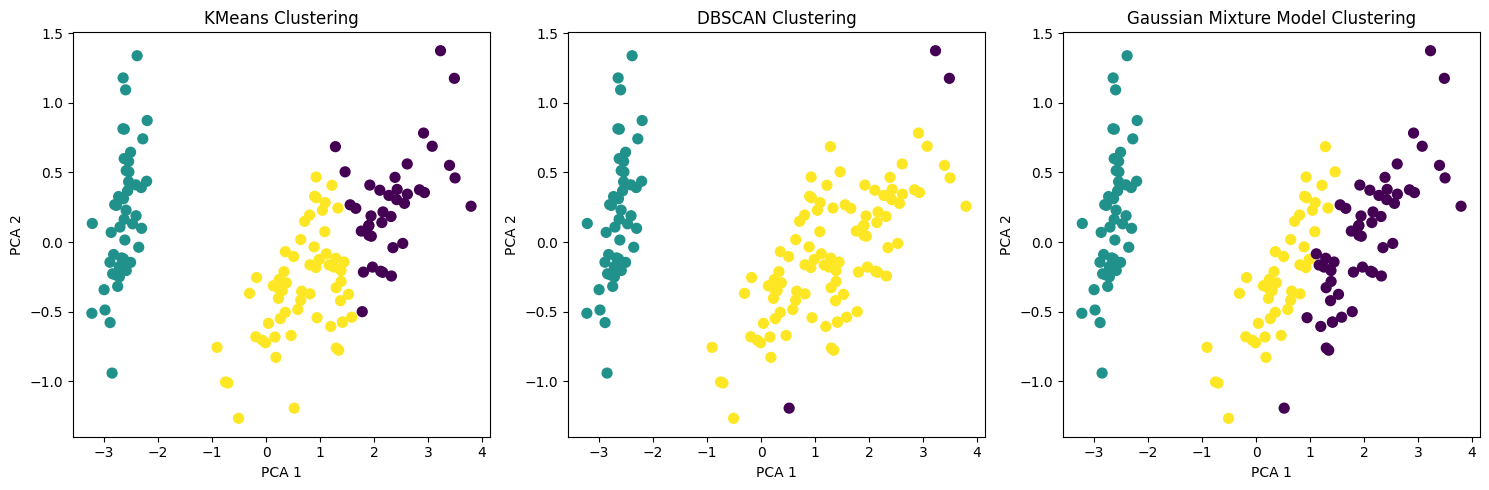

In [17]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 2)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.subplot(1, 3, 3)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(iris, kmeans_labels)
dbscan_silhouette = silhouette_score(iris, dbscan_labels)
gmm_silhouette = silhouette_score(iris, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.55
DBSCAN Silhouette Score: 0.50
Gaussian Mixture Model Silhouette Score: 0.50


# Interpretar

In [19]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [20]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris, kmeans_labels, test_size=0.2, random_state=42)


In [21]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [6.85384615 3.07692308 5.71538462 2.05384615]
Cluster 1: [5.006 3.428 1.462 0.246]
Cluster 2: [5.88360656 2.74098361 4.38852459 1.43442623]


In [22]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.97


In [23]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 3
DBSCAN Ripper Rules: 3

Reglas para clase: 0
[[petallength(cm)=5.3-5.7] V [sepallength(cm)=>6.9] V [petallength(cm)=4.93-5.3^sepallength(cm)=6.3-6.5]]

Reglas para clase: 1
[[petalwidth(cm)=<0.2] V [petalwidth(cm)=0.2-0.4] V [petallength(cm)=1.5-1.7]]

Reglas para clase: 2
[[petalwidth(cm)=1.3-1.5] V [petalwidth(cm)=1.1-1.3] V [sepallength(cm)=5.75-6.0] V [sepalwidth(cm)=<2.5] V [petallength(cm)=4.6-4.93]]


Decision Tree Accuracy: 0.93


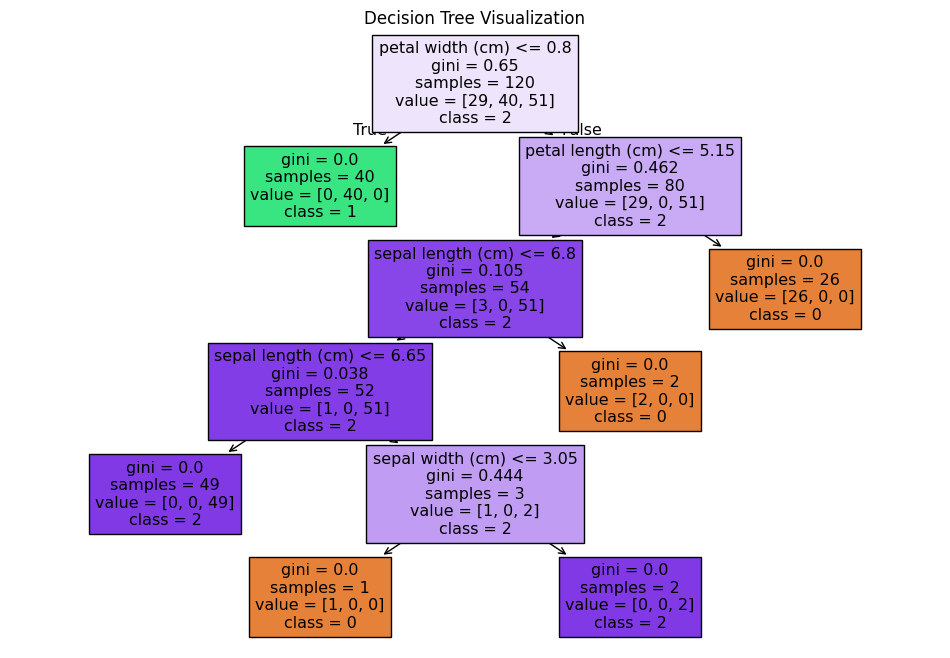

In [24]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=iris.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [25]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=iris.columns.tolist())


Optimization started

Training time: 4.18s, epochs: 200

Least training loss reached: 0.024


In [26]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.716] R15: petal width (cm) > 1.689
			0: 0.568	1: 0.000	2: 0.334	Unc: 0.098

	[0.683] R11: petal length (cm) > 4.904
			0: 0.683	1: 0.000	2: 0.000	Unc: 0.317

	[0.593] R3: sepal length (cm) > 6.362
			0: 0.593	1: 0.000	2: 0.000	Unc: 0.407

	[0.395] R6: 3.062 < sepal width (cm) < 3.363
			0: 0.280	1: 0.250	2: 0.024	Unc: 0.445

Most important rules for class 1

	[0.630] R1: 5.256 < sepal length (cm) < 5.809
			0: 0.000	1: 0.406	2: 0.573	Unc: 0.021

	[0.627] R8: petal length (cm) < 2.550
			0: 0.000	1: 0.627	2: 0.000	Unc: 0.373

	[0.597] R12: petal width (cm) < 0.678
			0: 0.000	1: 0.597	2: 0.000	Unc: 0.403

	[0.538] R0: sepal length (cm) < 5.256
			0: 0.000	1: 0.538	2: 0.000	Unc: 0.462

	[0.524] R7: sepal width (cm) > 3.363
			0: 0.132	1: 0.462	2: 0.000	Unc: 0.406

	[0.373] R6: 3.062 < sepal width (cm) < 3.363
			0: 0.280	1: 0.250	2: 0.024	Unc: 0.445

Most important rules for class 2

	[0.749] R1: 5.256 < sepal length (cm) < 5.809
			0: 0.000	1: 0.

In [27]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 1.00


## DBSCAN

In [28]:
#dividir los datos en entrenamiento y prueba
n_clusters_dbscan = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(iris, dbscan_labels, test_size=0.2, random_state=42)


In [29]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.97


In [30]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 3
DBSCAN Ripper Rules: 10

Reglas para clase: 0
[[petalwidth(cm)=<0.2] V [petalwidth(cm)=0.2-0.4] V [petallength(cm)=1.5-1.7]]

Reglas para clase: 1
[[sepalwidth(cm)=2.8-3.0] V [sepallength(cm)=6.0-6.3] V [sepalwidth(cm)=<2.5] V [sepalwidth(cm)=2.5-2.7] V [sepallength(cm)=6.5-6.9] V [sepallength(cm)=>6.9] V [petallength(cm)=4.25-4.6] V [petalwidth(cm)=1.7-1.9] V [sepallength(cm)=6.3-6.5] V [petallength(cm)=4.93-5.3]]

Reglas para clase: 2
[[sepallength(cm)=>6.9^sepalwidth(cm)=>3.61]]


Decision Tree Accuracy: 0.97


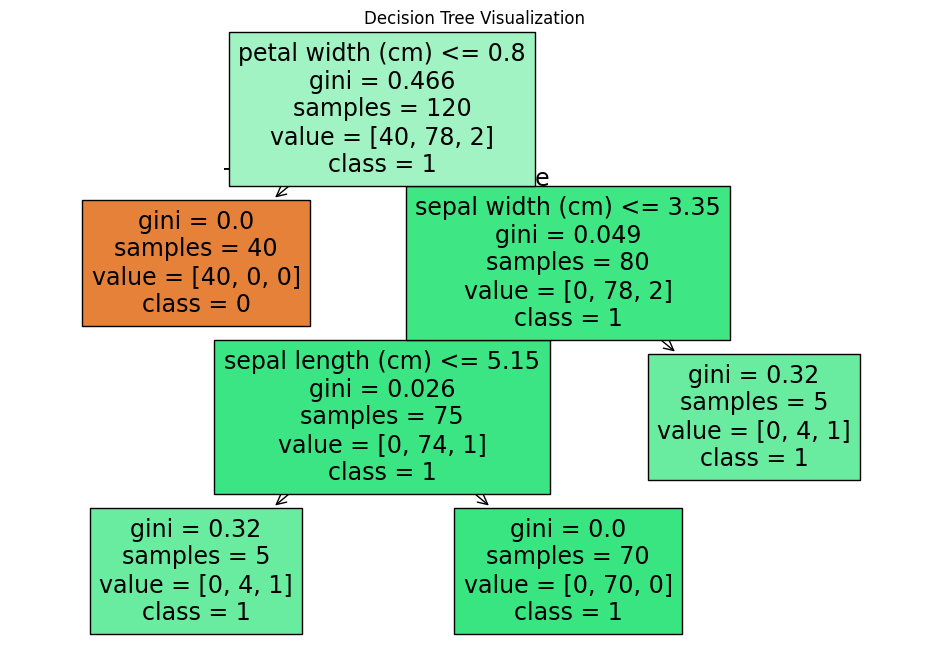

In [31]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=iris.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [32]:
ds = DSClassifierMultiQ(n_clusters_dbscan, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=iris.columns.tolist())


Optimization started

Training time: 4.32s, epochs: 200

Least training loss reached: 0.014


In [33]:
ds.print_most_important_rules(threshold=0.001)



Most important rules for class 0

	[0.615] R12: petal width (cm) < 0.678
			0: 0.615	1: 0.000	2: 0.000	Unc: 0.385

	[0.586] R8: petal length (cm) < 2.550
			0: 0.586	1: 0.000	2: 0.000	Unc: 0.414

	[0.512] R0: sepal length (cm) < 5.256
			0: 0.512	1: 0.000	2: 0.000	Unc: 0.488

	[0.492] R6: 3.062 < sepal width (cm) < 3.363
			0: 0.308	1: 0.476	2: 0.000	Unc: 0.216

	[0.486] R1: 5.256 < sepal length (cm) < 5.809
			0: 0.300	1: 0.486	2: 0.000	Unc: 0.214

	[0.480] R7: sepal width (cm) > 3.363
			0: 0.480	1: 0.000	2: 0.000	Unc: 0.520

	[0.091] R5: 2.760 < sepal width (cm) < 3.062
			0: 0.015	1: 0.526	2: 0.000	Unc: 0.459

Most important rules for class 1

	[0.683] R9: 2.550 < petal length (cm) < 3.727
			0: 0.000	1: 0.683	2: 0.000	Unc: 0.317

	[0.618] R1: 5.256 < sepal length (cm) < 5.809
			0: 0.300	1: 0.486	2: 0.000	Unc: 0.214

	[0.611] R6: 3.062 < sepal width (cm) < 3.363
			0: 0.308	1: 0.476	2: 0.000	Unc: 0.216

	[0.600] R11: petal length (cm) > 4.904
			0: 0.000	1: 0.600	2: 0.000	Unc: 0

In [34]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.97


## GMM

In [35]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris, gmm_labels, test_size=0.2, random_state=42)


In [36]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.90


In [37]:
r = ripper.get_rules()
string = str(r[0])
string1 = str(r[1])
rules = string.split('V')
rules1 = string1.split('V')
print("DBSCAN Ripper Rules:", len(rules))
print("DBSCAN Ripper Rules:", len(rules1))
ripper.print_rules()

DBSCAN Ripper Rules: 6
DBSCAN Ripper Rules: 3

Reglas para clase: 0
[[petalwidth(cm)=1.7-1.9] V [petallength(cm)=4.93-5.3] V [petalwidth(cm)=>2.1] V [petalwidth(cm)=1.9-2.1] V [petallength(cm)=5.3-5.7] V [petalwidth(cm)=1.5-1.7]]

Reglas para clase: 1
[[petalwidth(cm)=<0.2] V [petalwidth(cm)=0.2-0.4] V [petallength(cm)=1.5-1.7]]

Reglas para clase: 2
[[petallength(cm)=4.25-4.6] V [petallength(cm)=3.96-4.25] V [petallength(cm)=1.7-3.96] V [petallength(cm)=4.6-4.93^petalwidth(cm)=1.3-1.5]]


Decision Tree Accuracy: 0.93


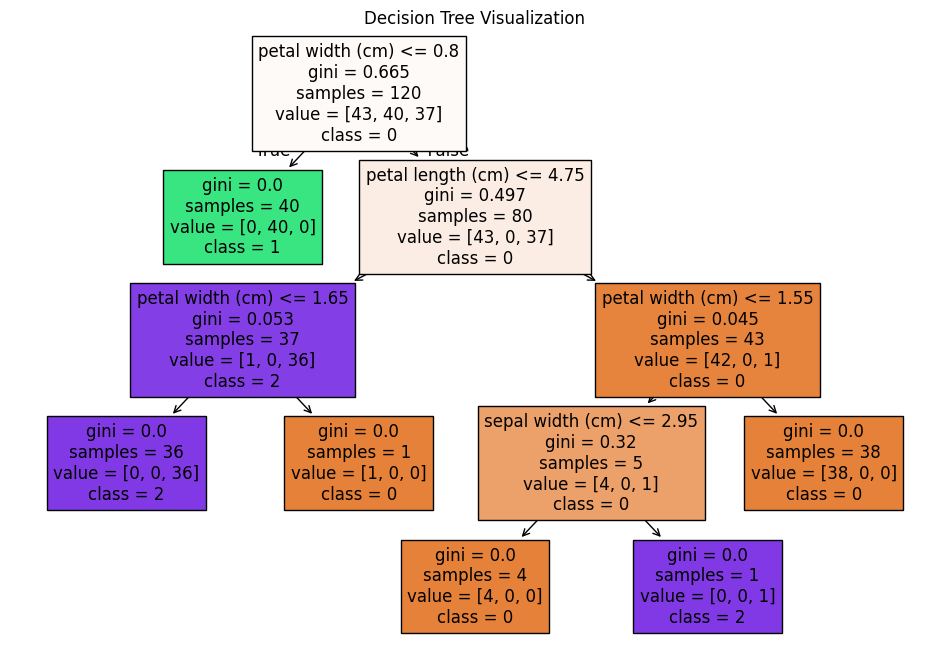

In [38]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=iris.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [39]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=iris.columns.tolist())


Optimization started

Training time: 3.96s, epochs: 200

Least training loss reached: 0.019


In [40]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.722] R4: sepal width (cm) < 2.760
			0: 0.586	1: 0.025	2: 0.279	Unc: 0.109

	[0.686] R11: petal length (cm) > 4.904
			0: 0.686	1: 0.000	2: 0.000	Unc: 0.314

	[0.671] R15: petal width (cm) > 1.689
			0: 0.671	1: 0.000	2: 0.000	Unc: 0.329

	[0.625] R3: sepal length (cm) > 6.362
			0: 0.481	1: 0.000	2: 0.332	Unc: 0.188

	[0.613] R2: 5.809 < sepal length (cm) < 6.362
			0: 0.613	1: 0.000	2: 0.000	Unc: 0.387

	[0.423] R5: 2.760 < sepal width (cm) < 3.062
			0: 0.350	1: 0.008	2: 0.152	Unc: 0.490

Most important rules for class 1

	[0.588] R12: petal width (cm) < 0.678
			0: 0.000	1: 0.588	2: 0.000	Unc: 0.412

	[0.577] R8: petal length (cm) < 2.550
			0: 0.000	1: 0.577	2: 0.000	Unc: 0.423

	[0.550] R0: sepal length (cm) < 5.256
			0: 0.000	1: 0.550	2: 0.000	Unc: 0.450

	[0.498] R7: sepal width (cm) > 3.363
			0: 0.000	1: 0.498	2: 0.000	Unc: 0.502

	[0.421] R1: 5.256 < sepal length (cm) < 5.809
			0: 0.027	1: 0.302	2: 0.256	Unc: 0.415

	[0.400] R6: 3.06

In [41]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.97
